In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

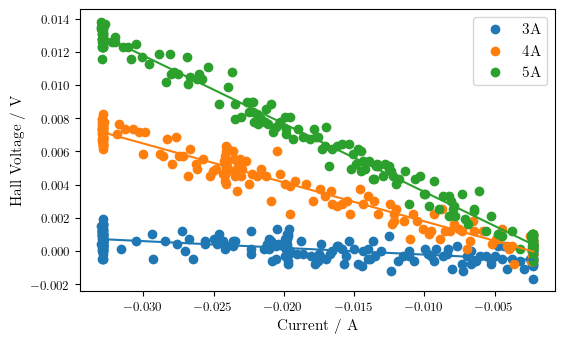

In [34]:
a_3A_r1_n = pd.read_csv('data/a_3A_r1_n.txt', sep='\t', skiprows=4)
a_4A_r1_n = pd.read_csv('data/a_4A_r1_n.txt', sep='\t', skiprows=4)
a_5A_r1_n = pd.read_csv('data/a_5A_r1_n.txt', sep='\t', skiprows=4)

# curve fit
def linear(x,m,b):
    return m*x + b

popt, pcov = curve_fit(linear, a_3A_r1_n['Current I_A1 / A'], a_3A_r1_n['Voltage U_B1 / V'])
m_3A, b_3A = popt
popt, pcov = curve_fit(linear, a_4A_r1_n['Current I_A1 / A'], a_4A_r1_n['Voltage U_B1 / V'])
m_4A, b_4A = popt
popt, pcov = curve_fit(linear, a_5A_r1_n['Current I_A1 / A'], a_5A_r1_n['Voltage U_B1 / V'])
m_5A, b_5A = popt


I = np.linspace(np.min(a_3A_r1_n['Current I_A1 / A']), np.max(a_3A_r1_n['Current I_A1 / A']))

plt.scatter(a_3A_r1_n['Current I_A1 / A'], a_3A_r1_n['Voltage U_B1 / V'],
           label='3A')
plt.plot(I, linear(I, m_3A, b_3A))


plt.scatter(a_4A_r1_n['Current I_A1 / A'], a_4A_r1_n['Voltage U_B1 / V'],
           label='4A')
plt.plot(I, linear(I, m_4A, b_4A))

plt.scatter(a_5A_r1_n['Current I_A1 / A'], a_5A_r1_n['Voltage U_B1 / V'],
            label='5A')
plt.plot(I, linear(I, m_5A, b_5A))

plt.legend()
plt.xlabel('Current / A')
plt.ylabel('Hall Voltage / V')
plt.tight_layout()

plt.savefig('build/V-A-n.pdf')

In [37]:
m_err, b_err = np.sqrt(np.diag(pcov))
m_err

0.0037591407084058203

In [27]:
popt

array([[1.04916506e-05, 2.18612732e-07],
       [2.18612732e-07, 5.80915998e-09]])

In [16]:
a_3A_r1_n

,"DEF=""Time"" t / s",Current I_A1 / A,Voltage U_B1 / V
0,0.00,-0.00230,0.00075
1,0.09,-0.00230,-0.00045
2,0.20,-0.00225,-0.00075
3,0.29,-0.00230,-0.00015
4,0.40,-0.00235,-0.00045
...,...,...,...
200,20.01,-0.03295,0.00045
201,20.10,-0.03290,0.00090
202,20.19,-0.03290,0.00075
203,20.30,-0.03290,0.00105


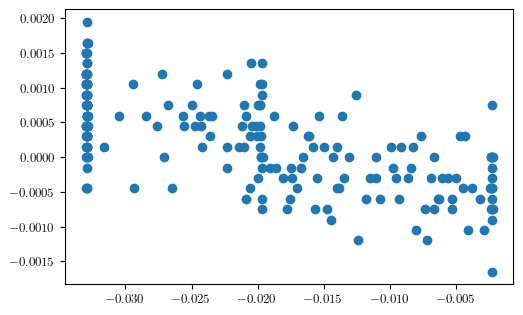

In [17]:
plt.scatter(a_3A_r1_n['Current I_A1 / A'], a_3A_r1_n['Voltage U_B1 / V'])